In [128]:
import pandas as pd  
import numpy as np

import scipy.stats as stats #for qq plot
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.preprocessing import FunctionTransformer  
from sklearn.compose import ColumnTransformer 

In [129]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ML\datasets\titanic.csv", usecols = ['Age','Fare','Survived'])

In [130]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

inspace = true means original dataframe gets modified
inspace = false is default and original data same rehta hai

In [131]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_16668\1927547245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16668\1927547245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [132]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [133]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [134]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [135]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)


C:\Users\Dell\AppData\Local\Temp\ipykernel_16668\2818946874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


Text(0.5, 1.0, 'age pdf')

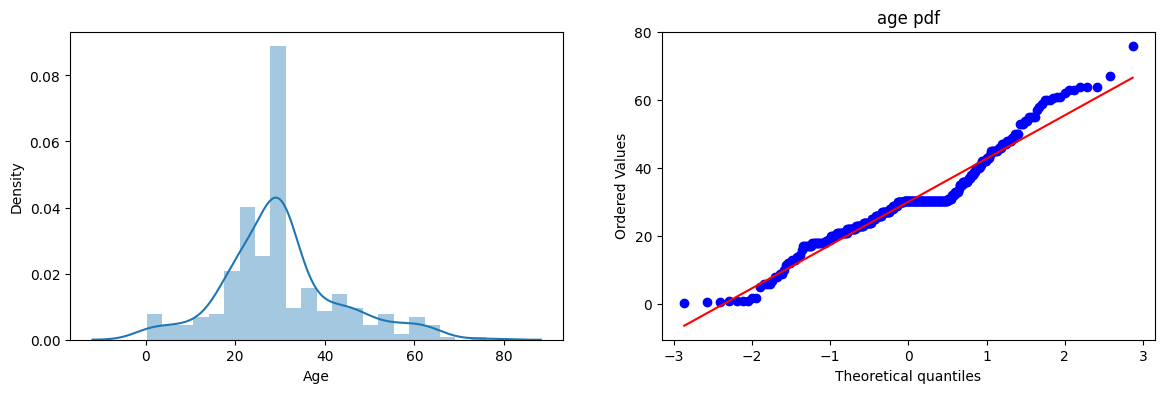

In [136]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
# sns.distplot(X_test['Fare'])


plt.subplot(122)
stats.probplot(X_train['Age'],dist = "norm" , plot = plt)
plt.title("age pdf")


C:\Users\Dell\AppData\Local\Temp\ipykernel_16668\3611488265.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


Text(0.5, 1.0, 'fare pdf')

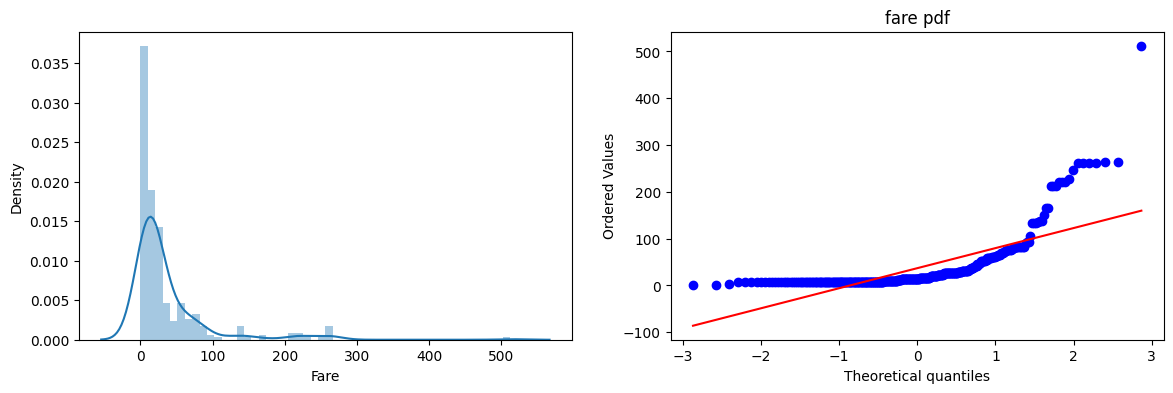

In [137]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
# sns.distplot(X_test['Fare'])


plt.subplot(122)
stats.probplot(X_train['Fare'],dist = "norm" , plot = plt)
plt.title("fare pdf")

In [138]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [139]:
clf.fit(X_train , y_train)
clf2.fit(X_train , y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print('accuracy lr', accuracy_score(y_test , y_pred))
print("acc dtc ", accuracy_score(y_test , y_pred1))

accuracy lr 0.6071428571428571
acc dtc  0.5357142857142857


we cannot use np.log for 0 that's why we use np.log1p it adds 1 in the starting

In [140]:
trf = FunctionTransformer(func= np.log1p)

In [141]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [142]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed , y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy new lr" , accuracy_score(y_test, y_pred))
print("Accuracy new dtc", accuracy_score(y_test , y_pred1))

Accuracy new lr 0.6190476190476191
Accuracy new dtc 0.5476190476190477


In [143]:
X_transformed = trf.fit_transform(X)

clf =  LogisticRegression()
clf2 = DecisionTreeClassifier() 

print("LR", np.mean(cross_val_score(clf,X_transformed , y , scoring = 'accuracy' , cv = 10)))
print("DT", np.mean(cross_val_score(clf2,X_transformed , y , scoring = 'accuracy' , cv = 10)))

LR 0.6556329849012775
DT 0.5982578397212542


cross val score -- 10 times train test split har baar accuracy nikalna then mean calculate krna isse zyada reliable result milte hai

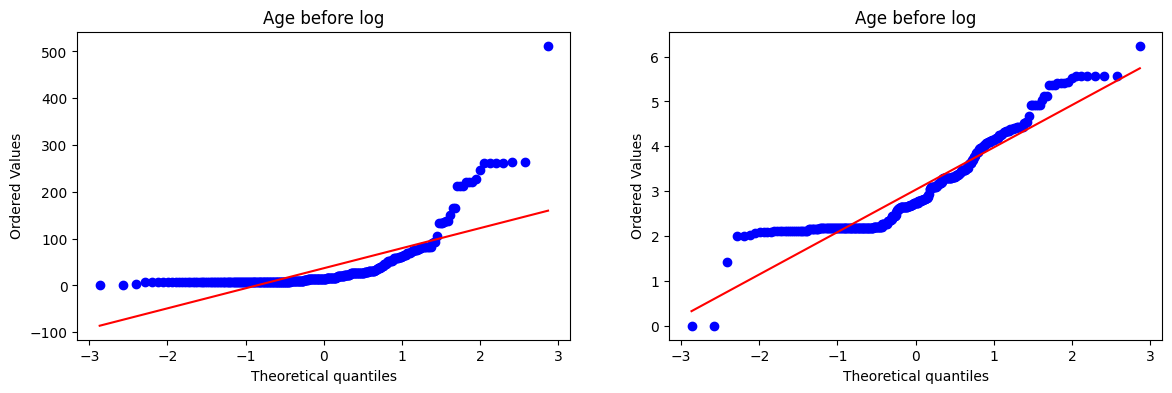

In [145]:
plt.figure(figsize = (14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist = "norm" ,plot = plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist = "norm" , plot = plt)
plt.title('Age before log')

plt.show() 

In [151]:
def apply_transform(transform):
    X =df.iloc[:,1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder = 'passthrough')
    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy" , np.mean(cross_val_score(clf , X_trans , y, scoring = "accuracy" , cv = 10)))
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'],dist = "norm" ,plot = plt)
    plt.title('Fare before transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0],dist="norm",plot = plt)
    plt.title("Fare after transform")
    plt.show()
   

Accuracy 0.6363530778164923


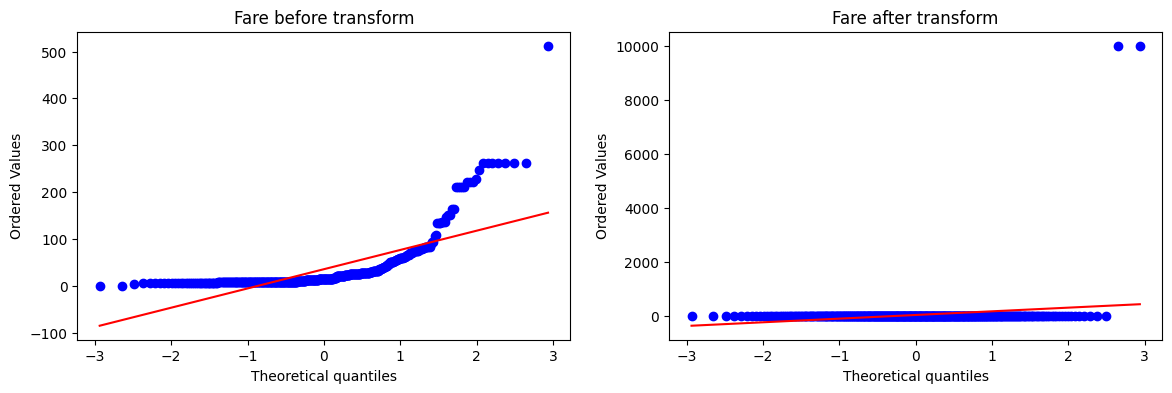

In [158]:
apply_transform(lambda x:1/(x+0.0001))
